<a href="https://colab.research.google.com/github/singhsneha99/Navigating-the-Job-Market/blob/main/Understanding_Job_Finding_Expectations_Across_Demographics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Read the CSV file into a DataFrame
data = pd.read_csv('job.csv')




In [12]:
# Creating separate columns for Year and Month
data[['Year', 'Month']] = data['Year Month'].astype(str).str.extract(r'(\d{4})(\d{2})')

# Convert relevant columns to the appropriate data types
data[['Year', 'Month']] = data[['Year', 'Month']].astype(int)
data.iloc[:, 2:] = data.iloc[:, 2:].astype(float)

data = data.drop('Year Month', axis=1)

# Displaying the DataFrame and missing values information
print("DataFrame:")
print(data)
print("\nMissing Values:")
print(data.isnull().sum())

DataFrame:
     Age Under 40  Age 40-60  Age Over 60  Education High School or Less  \
0           56.47      47.23        41.68                          46.50   
1           51.21      45.38        36.62                          38.91   
2           53.78      44.42        31.42                          36.30   
3           52.71      47.06        30.13                          38.61   
4           54.59      45.53        32.46                          41.36   
..            ...        ...          ...                            ...   
122         58.27      57.14        45.04                          51.92   
123         56.44      57.49        53.04                          51.32   
124         54.20      59.58        53.15                          53.81   
125         56.94      55.50        50.79                          48.89   
126         56.13      58.00        48.74                          53.75   

     Education Some College  Education BA or Higher  Income under 50k  \
0  

<ipython-input-12-5e175522c40c>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 2:] = data.iloc[:, 2:].astype(float)


In [13]:
# Summary statistics
summary_stats = data.describe()
print(summary_stats)

       Age Under 40   Age 40-60  Age Over 60  Education High School or Less  \
count    127.000000  127.000000   127.000000                     127.000000   
mean      59.264803   54.822283    43.042992                      51.349449   
std        4.011984    5.185628     6.617966                       6.546750   
min       49.460000   43.650000    25.270000                      35.110000   
25%       56.255000   51.080000    37.725000                      48.105000   
50%       59.570000   56.550000    44.020000                      52.020000   
75%       62.305000   58.960000    47.985000                      55.620000   
max       67.980000   63.890000    56.830000                      66.520000   

       Education Some College  Education BA or Higher  Income under 50k  \
count              127.000000              127.000000        127.000000   
mean                55.294016               56.828976         50.417402   
std                  4.111275                3.767512          

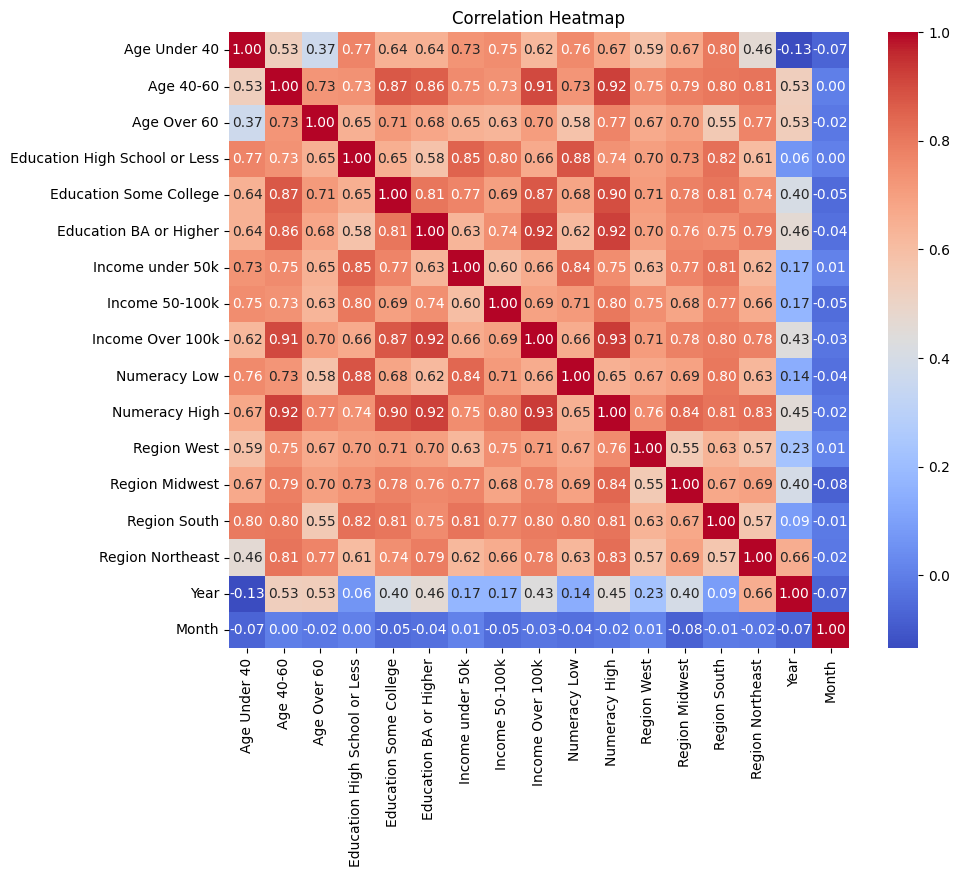

In [20]:
# Correlation matrix
correlation_matrix = data.corr()
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

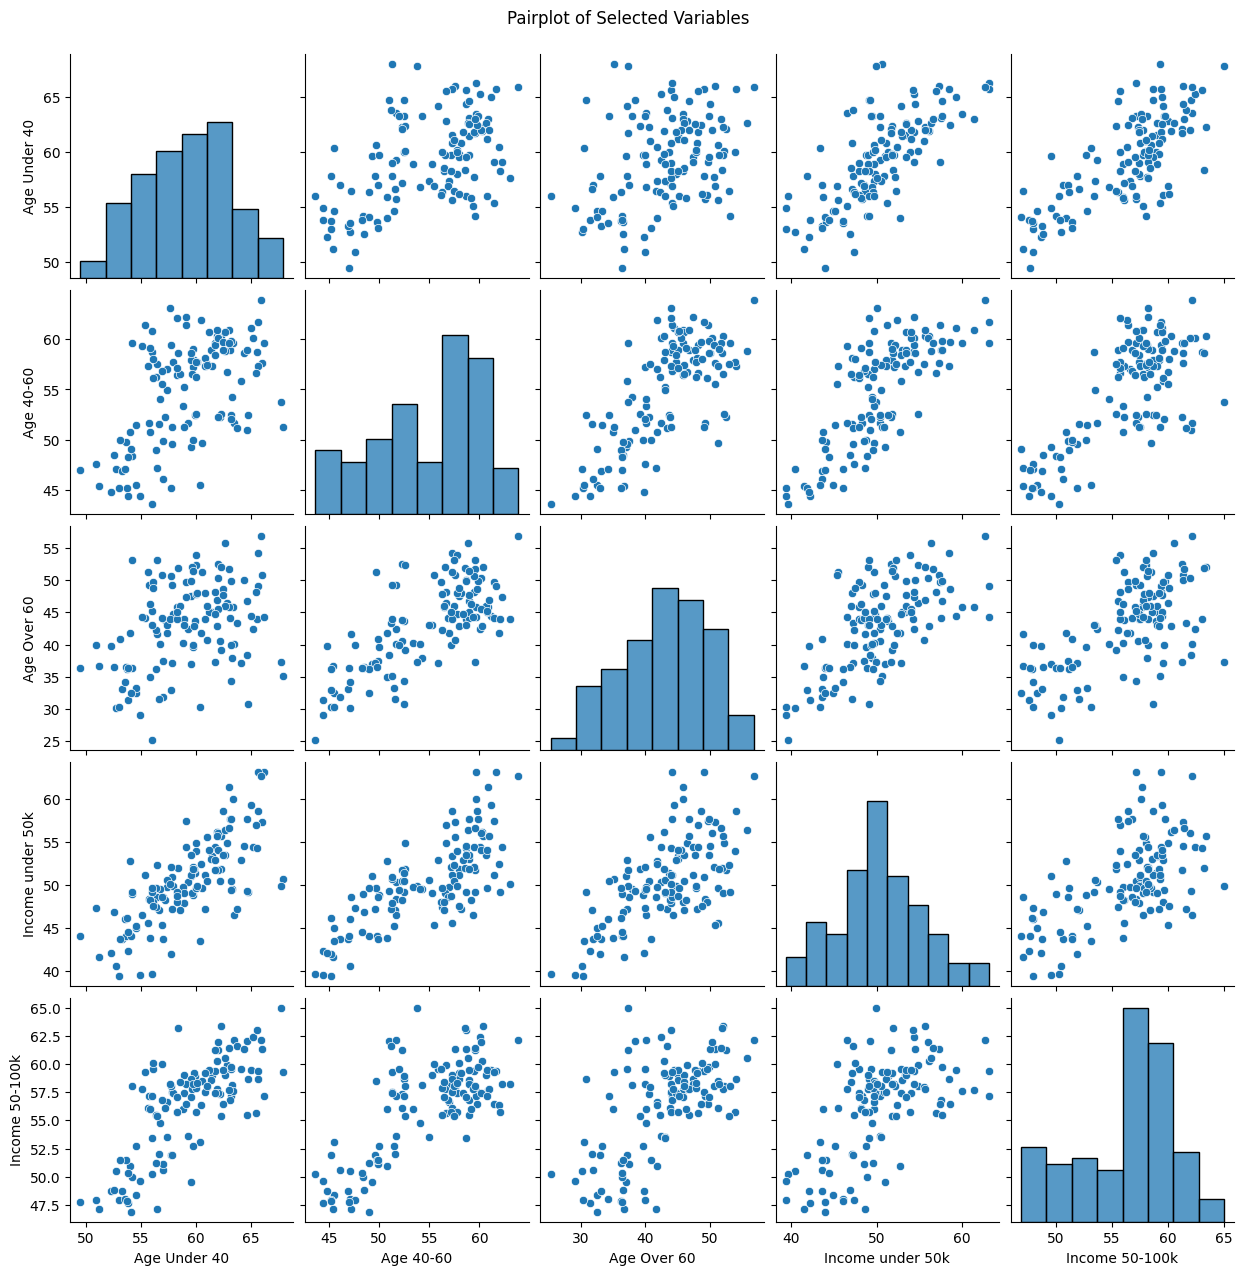

In [19]:
# Pairplot to visualize relationships between variables
sns.pairplot(data=data, vars=['Age Under 40', 'Age 40-60', 'Age Over 60', 'Income under 50k', 'Income 50-100k'])
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()


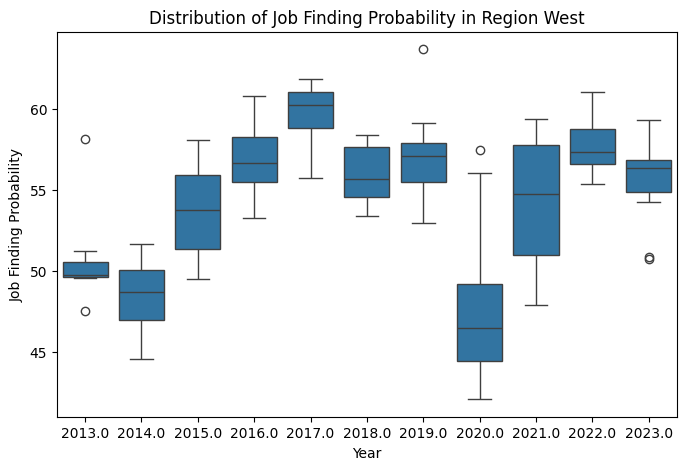

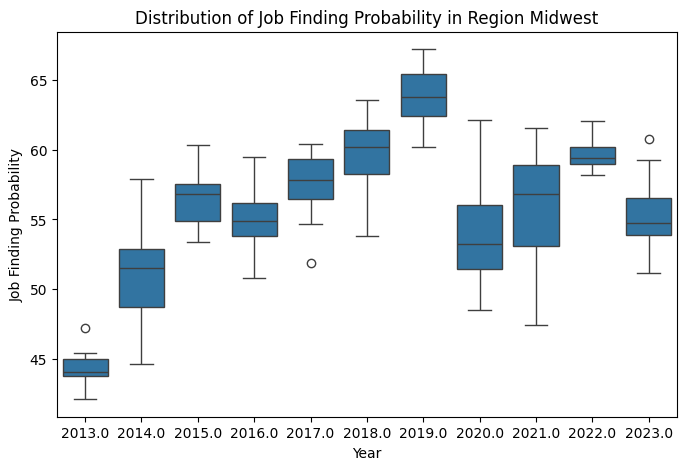

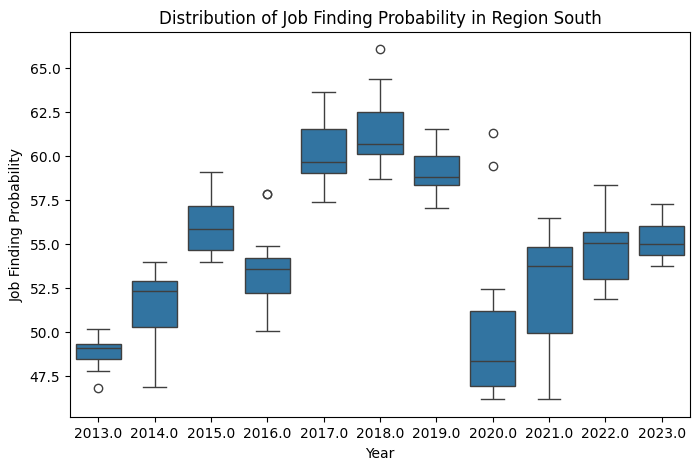

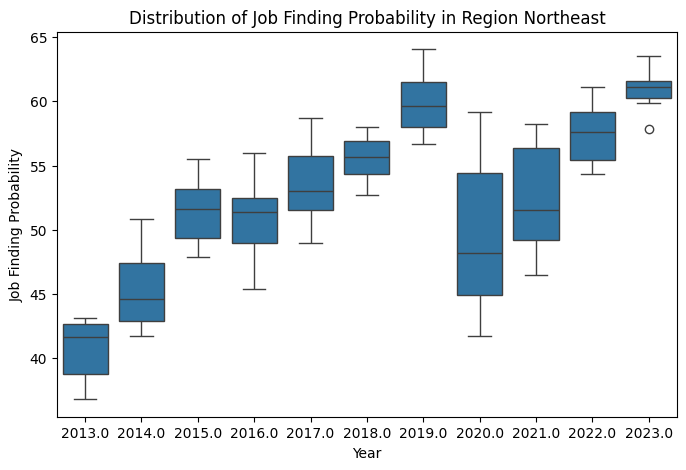

In [21]:
# Explore regional differences
regions = ['Region West', 'Region Midwest', 'Region South', 'Region Northeast']
for region in regions:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Year', y=region, data=data)
    plt.title(f'Distribution of Job Finding Probability in {region}')
    plt.xlabel('Year')
    plt.ylabel('Job Finding Probability')
    plt.show()

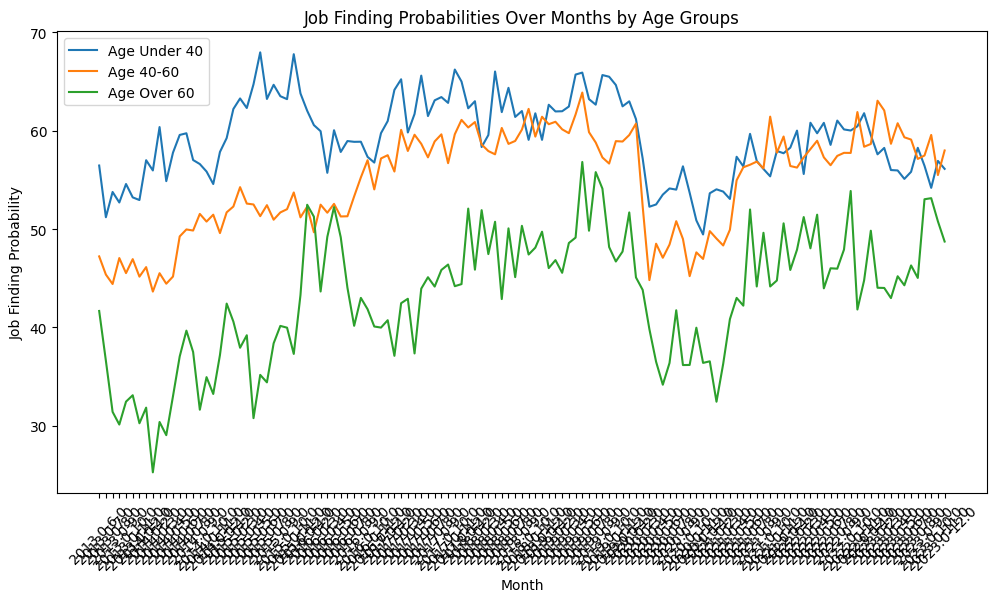

In [23]:
#Time Series Plot of Job Finding Probabilities Over Months
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Year'].astype(str) + '-' + data['Month'].astype(str), data['Age Under 40'], label='Age Under 40')
plt.plot(data['Year'].astype(str) + '-' + data['Month'].astype(str), data['Age 40-60'], label='Age 40-60')
plt.plot(data['Year'].astype(str) + '-' + data['Month'].astype(str), data['Age Over 60'], label='Age Over 60')
plt.title('Job Finding Probabilities Over Months by Age Groups')
plt.xlabel('Month')
plt.ylabel('Job Finding Probability')
plt.legend()
plt.xticks(rotation=45)
plt.show()


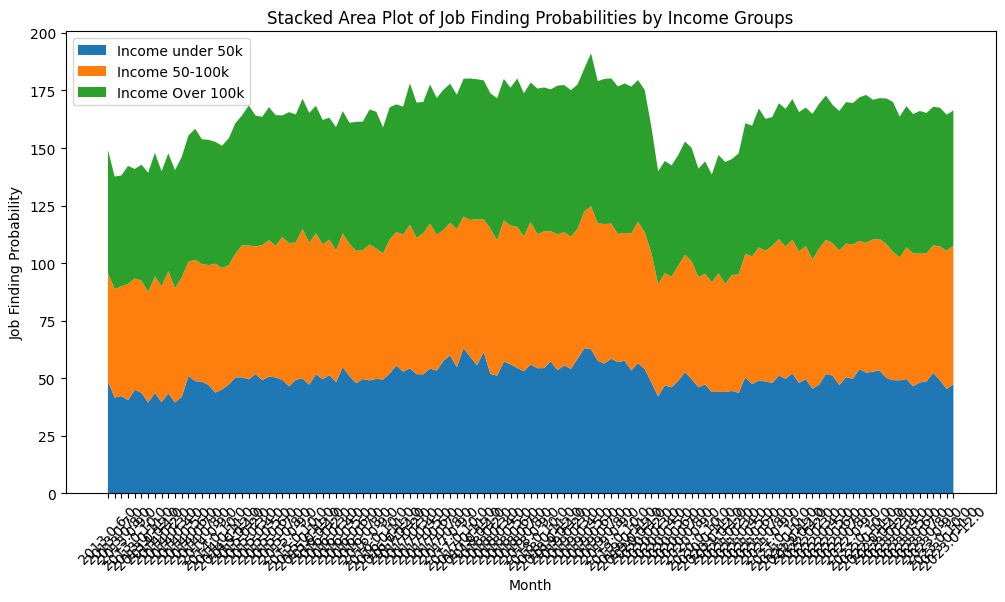

In [25]:
# Stacked Area Plot for Income Groups
import matplotlib.pyplot as plt

income_groups = ['Income under 50k', 'Income 50-100k', 'Income Over 100k']

plt.figure(figsize=(12, 6))
plt.stackplot(data['Year'].astype(str) + '-' + data['Month'].astype(str),
              [data[group] for group in income_groups],
              labels=income_groups)
plt.title('Stacked Area Plot of Job Finding Probabilities by Income Groups')
plt.xlabel('Month')
plt.ylabel('Job Finding Probability')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()


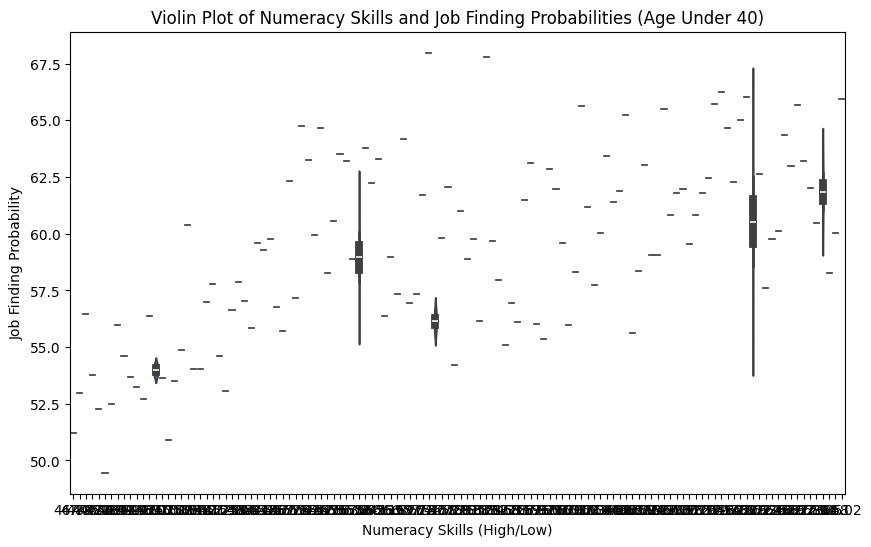

In [27]:
#Violin Plot of Numeracy Skills and Job Finding Probabilities
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.violinplot(x='Numeracy High', y='Age Under 40', data=data)
plt.title('Violin Plot of Numeracy Skills and Job Finding Probabilities (Age Under 40)')
plt.xlabel('Numeracy Skills (High/Low)')
plt.ylabel('Job Finding Probability')
plt.show()


<ipython-input-28-70e8a4c472bd>:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 2:] = data.iloc[:, 2:].astype(float)


Mean Squared Error: 0.21243322555072816
R-squared: 0.9812533261854322


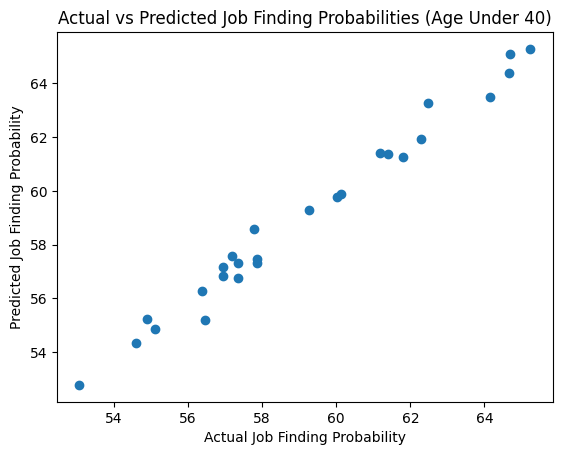

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv('job.csv')

# Extract 'Year' and 'Month' from 'Year Month' and drop the original column
data[['Year', 'Month']] = data['Year Month'].astype(str).str.extract(r'(\d{4})(\d{2})')
data = data.drop('Year Month', axis=1)

# Convert relevant columns to the appropriate data types
data[['Year', 'Month']] = data[['Year', 'Month']].astype(int)
data.iloc[:, 2:] = data.iloc[:, 2:].astype(float)

# Feature columns (excluding 'Year', 'Month', and the target variable)
features = data.drop(['Year', 'Month', 'Age Under 40'], axis=1)

# Target variable
target = data['Age Under 40']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Job Finding Probability')
plt.ylabel('Predicted Job Finding Probability')
plt.title('Actual vs Predicted Job Finding Probabilities (Age Under 40)')
plt.show()


<ipython-input-30-87ac60603e7a>:18: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 2:] = data.iloc[:, 2:].astype(float)


           Linear Regression  Random Forest  Gradient Boosting  \
MSE                 0.212433       2.560454           2.304137   
R-squared           0.981253       0.774047           0.796666   

           Support Vector Regression  
MSE                         2.592154  
R-squared                   0.771249  


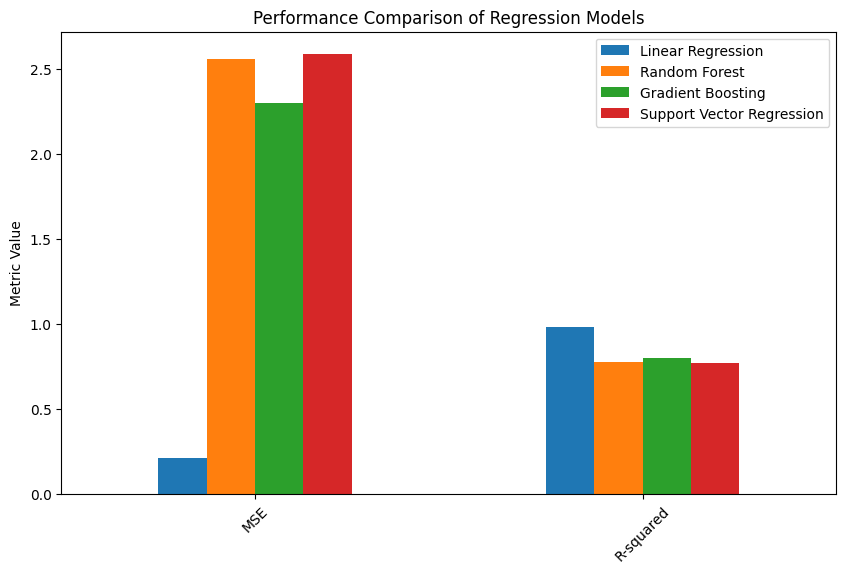

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv('job.csv')

# Extract 'Year' and 'Month' from 'Year Month' and drop the original column
data[['Year', 'Month']] = data['Year Month'].astype(str).str.extract(r'(\d{4})(\d{2})')
data = data.drop('Year Month', axis=1)

# Convert relevant columns to the appropriate data types
data[['Year', 'Month']] = data[['Year', 'Month']].astype(int)
data.iloc[:, 2:] = data.iloc[:, 2:].astype(float)

# Feature columns (excluding 'Year', 'Month', and the target variable)
features = data.drop(['Year', 'Month', 'Age Under 40'], axis=1)

# Target variable
target = data['Age Under 40']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train multiple regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R-squared': r2}

# Compare the performance of different regression models
results_df = pd.DataFrame(results)
print(results_df)

# Visualize the results graphically
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Comparison of Regression Models')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.show()
